In [287]:
#Importing required libraries
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import math

In [288]:
#function to parse date time
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

In [289]:
#function to find root mean square error
def rmse(predictions, actual):
    mse = mean_squared_error(actual, predictions)
    return math.sqrt(mse)

In [290]:
#read training data
train_data = pd.read_csv('/Users/vivek jangir/Documents/Time_Series/train_csv.csv',index_col=1,parse_dates=[1],date_parser=parser)
train_data = train_data.drop('id', axis=1)

#read test data
test_data = pd.read_csv('/Users/vivek jangir/Documents/Time_Series/test_csv.csv',parse_dates=[1],date_parser=parser)


In [291]:
train_data.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


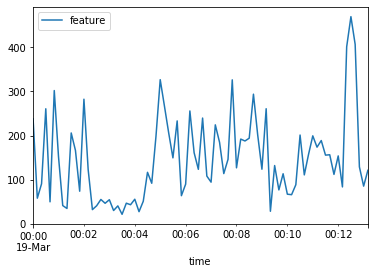

In [292]:
train_data.plot()

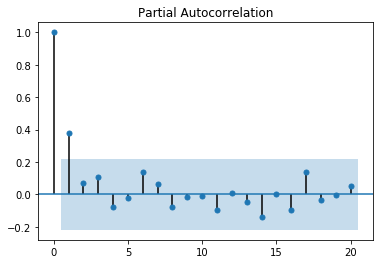

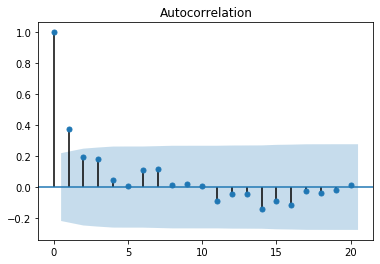

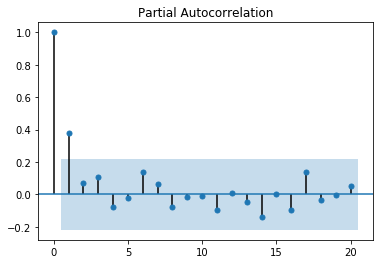

In [293]:
#plotting autocorrelation and partialautocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train_data)
plot_pacf(train_data)

In [294]:
#SARIMA Model
x = train_data.values
x_train = x[0:60]
x_test = x[60:]

In [295]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [296]:
#training for the first 60 data points
model_sarima = SARIMAX(x_train,order=(5, 0, 1),seasonal_order=(0, 1, 1, 12),enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()

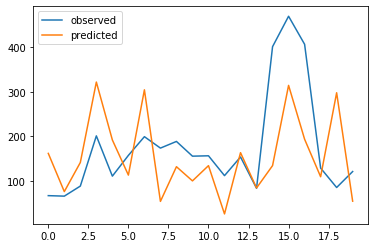

In [297]:
pred_future = model_sarima_fit.predict(start=61,end=80,dynamic=False)
plt.plot(x_test, label = 'observed')
plt.plot(pred_future, label = 'predicted')
plt.legend()

In [298]:
#calculating RMSE
rmse_value = rmse(pred_future,x_test)
print("RMSE value =",rmse_value)

RMSE value = 115.22220430850994


In [299]:
#training on the entire data
model_sarima = SARIMAX(x,order=(5, 0, 1),seasonal_order=(0, 1, 1, 12),enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()

In [300]:
#Plotting future predictions for test data

In [301]:
pred_future = model_sarima_fit.predict(start=81,end=120,dynamic=False)
df = pd.DataFrame(pred_future)
df.columns = ['feature']

In [304]:
output = pd.concat([test_data, df],axis=1, sort =False)
output = output.drop('id', axis=1)
output = output.set_index('time')

RMSE value = 115.22220430850994


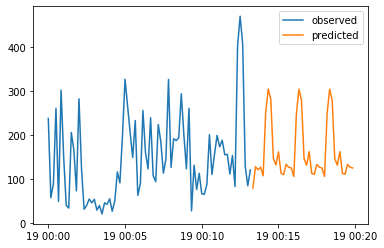

In [305]:
plt.plot(train_data,label='observed')
plt.plot(output,label='predicted')
plt.legend()
print("RMSE value =",rmse_value)